<a href="https://colab.research.google.com/github/AFNANAMIN/AI_Freelancing/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd /content/drive/My\ Drive/task2/

/content/drive/My Drive/task2


In [19]:
!ls

w1.txt			   Weights-019--1.23467.hdf5  Weights-424--1.09380.hdf5
w2.txt			   Weights-020--1.22652.hdf5  Weights-469--1.06395.hdf5
Weights-001--1.81072.hdf5  Weights-028--1.20386.hdf5  Weights-482--1.05137.hdf5
Weights-002--1.70528.hdf5  Weights-031--1.14942.hdf5  Weights-483--1.04641.hdf5
Weights-003--1.63445.hdf5  Weights-282--1.14684.hdf5  X_test.csv
Weights-006--1.42797.hdf5  Weights-331--1.13016.hdf5  X_train.csv
Weights-009--1.33325.hdf5  Weights-346--1.11884.hdf5  Y_test.csv
Weights-012--1.24048.hdf5  Weights-368--1.10558.hdf5  Y_train.csv


In [20]:
train=pd.read_csv('X_train.csv',header=None)
test=pd.read_csv('X_test.csv',header=None)
label_train=pd.read_csv('Y_train.csv',names=['target'])
label_test=pd.read_csv('Y_test.csv',names=['target'])
merged_train = train.join(label_train)
merged_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,target
0,11,3,0,4,-1.000000,-1.0,-1.000000,-1.00,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,0,3,0,0,0,0,0,0,6,0,0,0.000000,0.000000,0,0,0,0,0.000000,647,5,36.990000,2,647,1553.000000,3
1,14,4,1,6,-1.000000,1.0,-1.000000,-1.00,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,20,3,0,0,0,0,1,0,8,1,0,39.000000,1.000000,0,0,0,1,3.000000,1143,5,36.990000,2,1143,1553.000000,0
2,14,4,2,6,-1.000000,1.0,0.000000,-1.00,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,...,0,0,0,0,0,1,0,0,0,0,0,14,1,22,0,20,3,0,0,0,0,1,0,6,1,11,65.500000,0.500000,1,0,0,1,1.500000,1230,5,36.990000,2,1230,1553.000000,3
3,24,9,4,10,-1.000000,0.0,0.000000,-1.00,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,...,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,20,4,14,4,0,0,2,0,6,2,11,41.250000,0.500000,2,0,0,2,1.500000,2159,5,36.990000,2,2159,1553.000000,2
4,28,10,5,13,-1.000000,0.5,0.000000,-1.00,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,...,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,30,4,14,4,0,0,4,0,8,3,12,39.200000,0.500000,2,0,1,2,1.600000,2586,5,36.990000,2,2586,1553.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,40,6,11,5,0.333333,0.0,0.111111,0.25,0.0,0,42,0,0,0,2,9,0,0,1,1,0,1,204,4,46,17,51,18,0,75,192,0,208,44,19,47,17,1,62,0,...,0,4,0,0,6,0,1,0,2,0,40,0,2,28,0,34,1,7,4,6,0,7,0,8,5,44,66.181818,0.244949,6,3,0,2,0.818182,1385,18,54.485322,5,1385,1156.777778,1
1196,40,6,12,5,0.333333,0.0,0.333333,0.25,0.0,0,46,0,0,0,2,12,0,0,1,1,0,1,209,4,52,18,64,18,0,82,212,0,213,44,19,53,18,1,63,0,...,0,4,0,0,6,0,1,0,2,0,40,0,2,35,0,34,1,7,4,6,0,7,0,42,6,46,73.500000,0.252315,6,4,0,2,0.833333,1473,18,54.485322,5,1473,1156.777778,0
1197,42,6,13,5,0.333333,0.0,0.333333,0.25,0.0,0,48,0,0,0,2,12,0,0,1,1,0,1,214,4,54,18,64,18,0,88,221,0,218,47,19,55,18,1,66,0,...,0,4,0,0,6,0,1,0,2,0,49,0,2,35,0,34,1,7,4,6,0,7,0,2,6,48,71.307692,0.232906,7,4,0,2,0.769231,1531,18,54.485322,5,1531,1156.777778,3
1198,43,9,14,5,0.333333,0.0,0.333333,1.00,0.0,0,49,0,0,0,2,12,0,0,1,1,0,1,277,4,54,19,145,18,0,88,334,0,282,76,19,55,19,1,71,0,...,0,4,0,0,8,0,1,0,3,0,49,0,2,35,0,34,1,7,4,6,0,7,0,31,7,48,68.000000,0.287698,7,4,0,3,0.928571,1962,18,54.485322,5,1962,1156.777778,3


In [0]:
combine=train.append(test)

In [23]:
combine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897
0,11,3,0,4,-1.0,-1.0,-1.0,-1.0,-1.0,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,0,3,0,0,0,0,0,0,6,0,0,0.00,0.0,0,0,0,0,0.0,647,5,36.990000,2,647,1553.000000
1,14,4,1,6,-1.0,1.0,-1.0,-1.0,-1.0,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,20,3,0,0,0,0,1,0,8,1,0,39.00,1.0,0,0,0,1,3.0,1143,5,36.990000,2,1143,1553.000000
2,14,4,2,6,-1.0,1.0,0.0,-1.0,-1.0,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,...,0,0,0,0,0,0,1,0,0,0,0,0,14,1,22,0,20,3,0,0,0,0,1,0,6,1,11,65.50,0.5,1,0,0,1,1.5,1230,5,36.990000,2,1230,1553.000000
3,24,9,4,10,-1.0,0.0,0.0,-1.0,-1.0,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,...,0,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,20,4,14,4,0,0,2,0,6,2,11,41.25,0.5,2,0,0,2,1.5,2159,5,36.990000,2,2159,1553.000000
4,28,10,5,13,-1.0,0.5,0.0,-1.0,-1.0,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,...,0,0,0,0,0,0,2,2,0,0,0,0,23,2,22,0,30,4,14,4,0,0,4,0,8,3,12,39.20,0.5,2,0,1,2,1.6,2586,5,36.990000,2,2586,1553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,7,1,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,4,7,0,0,12,0,19,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0.00,0.0,0,0,0,0,0.0,103,2,17.000000,2,103,125.000000
395,8,1,1,0,-1.0,1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,22,0,0,4,8,7,0,3,17,0,22,0,1,0,4,0,10,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,1,0,34.00,1.0,0,0,0,1,3.0,147,2,17.000000,2,147,125.000000
396,7,1,0,2,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,1,0,1,18,2,14,3,14,6,0,0,40,0,18,11,9,15,3,0,10,0,...,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0.00,0.0,0,0,0,0,0.0,201,7,64.138095,5,201,1779.142857
397,21,8,1,4,-1.0,-1.0,-1.0,0.0,-1.0,0,13,0,0,0,1,0,0,1,0,1,0,1,131,4,22,6,69,18,6,23,156,0,134,31,19,22,6,0,34,0,...,5,0,0,0,0,19,0,0,2,4,0,0,0,2,0,3,26,0,0,0,0,0,0,0,31,0,5,121.00,0.0,1,0,0,0,0.0,833,7,64.138095,5,833,1779.142857


In [61]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(combine)
#X_scale = min_max_scaler.fit_transform(train_x_test)
X_scale.shape

(1599, 898)

In [0]:
def split_combined():
    global X_scale
    train = X_scale[:1200]
    test = X_scale[1200:]

    return train , test 

In [0]:
train, test = split_combined()

In [64]:
train

array([[0.01694915, 0.03896104, 0.        , ..., 0.25      , 0.02611293,
        0.09353988],
       [0.02157165, 0.05194805, 0.00512821, ..., 0.25      , 0.04613149,
        0.09353988],
       [0.02157165, 0.05194805, 0.01025641, ..., 0.25      , 0.04964281,
        0.09353988],
       ...,
       [0.06471495, 0.07792208, 0.06666667, ..., 1.        , 0.06179118,
        0.06967473],
       [0.06625578, 0.11688312, 0.07179487, ..., 1.        , 0.07918634,
        0.06967473],
       [0.06933744, 0.11688312, 0.07692308, ..., 1.        , 0.08067966,
        0.06967473]])

In [0]:
NN_model = Sequential()

In [0]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

In [0]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [0]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [69]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               115072    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 279,937
Trainable params: 279,937
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [71]:
NN_model.fit(train, label_train.target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 960 samples, validate on 240 samples
Epoch 1/500
960/960 [==============================] - 1s 688us/step - loss: 1.3450 - acc: 0.2458 - val_loss: 1.2719 - val_acc: 0.1042

Epoch 00001: val_loss improved from inf to 1.27190, saving model to Weights-001--1.27190.hdf5
Epoch 2/500
960/960 [==============================] - 0s 225us/step - loss: 1.0045 - acc: 0.3031 - val_loss: 1.0806 - val_acc: 0.3542

Epoch 00002: val_loss improved from 1.27190 to 1.08058, saving model to Weights-002--1.08058.hdf5
Epoch 3/500
960/960 [==============================] - 0s 223us/step - loss: 0.9132 - acc: 0.3406 - val_loss: 1.1153 - val_acc: 0.3042

Epoch 00003: val_loss did not improve from 1.08058
Epoch 4/500
960/960 [==============================] - 0s 226us/step - loss: 0.8539 - acc: 0.4083 - val_loss: 0.9350 - val_acc: 0.3750

Epoch 00004: val_loss improved from 1.08058 to 0.93502, saving model to Weights-004--0.93502.hdf5
Epoch 5/500
960/960 [==============================] - 0s 208us/step 

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-483--1.04641.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:

predictions = NN_model.predict(test)
predictions
#scores = NN_model.evaluate(predictions,label_test.target.values, verbose=1)
#res=NN_model.evaluate(predictions,label_test.target)

array([[1.4775821],
       [1.4474071],
       [1.8636788],
       [1.7674415],
       [1.5171188],
       [1.4717461],
       [1.3327038],
       [1.4276465],
       [1.2691916],
       [1.7284085],
       [1.7189759],
       [1.5568954],
       [1.4766835],
       [1.7321483],
       [1.7358632],
       [1.7459153],
       [1.8139917],
       [1.7737814],
       [1.544687 ],
       [1.732504 ],
       [1.7372626],
       [1.7159225],
       [1.7785374],
       [1.2944459],
       [1.278225 ],
       [1.7614675],
       [1.6735955],
       [1.6296952],
       [1.7630457],
       [1.2199517],
       [1.863884 ],
       [1.8261522],
       [1.6151024],
       [1.5814903],
       [1.7771891],
       [1.9159453],
       [1.8419005],
       [1.7009153],
       [1.8864454],
       [1.8804176],
       [1.8591343],
       [1.6754752],
       [1.714995 ],
       [1.7063984],
       [1.6672928],
       [1.5272135],
       [1.7415657],
       [1.5879565],
       [1.6080159],
       [1.6017834],


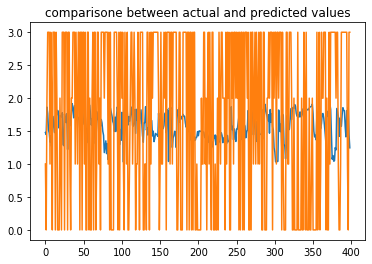

In [76]:
plt.title("comparisone between actual and predicted values")
#plt=plt.figure(200)
plt.plot(predictions)
plt.plot(label_test.target)